<a href="https://colab.research.google.com/github/Frenchyy1/test/blob/master/Coronavirus1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lecture

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url='https://www.data.gouv.fr/fr/datasets/r/f4935ed4-7a88-44e4-8f8a-33910a151d42'
df=pd.read_csv(url, sep=';', skiprows=3)

In [0]:
df.head()

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
0,2020-04-22,Andorre,717,37,282,5.16,39.33,55.51
1,2020-04-22,Émirats Arabes Unis,8238,52,1546,0.63,18.77,80.60
2,2020-04-22,Afghanistan,1176,40,166,3.40,14.12,82.48
3,2020-04-22,Antigua-et-Barbuda,24,3,7,12.50,29.17,58.33
4,2020-04-22,Albanie,634,27,356,4.26,56.15,39.59


# Graphique sur la base du nb de jours écoulés

In [0]:
df200=df[df.Infections > 200]

In [0]:
df200.sort_values(["Pays", "Date"], ascending=True, inplace=True)
df200['Dat1'] = df200.groupby(['Pays'])['Date'].transform('first')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
df200.Date=pd.to_datetime(df200.Date)
df200.Dat1=pd.to_datetime(df200.Dat1)
df200['time since'] = (df200['Date'] - df200["Dat1"]).dt.days

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
worldstat = df200.groupby('Pays')["Infections"].sum().sort_values(ascending=False)
c10 = worldstat.head(10).index.tolist()
c10cases = df200[df200['Pays'].isin(c10)]
cis= df200[df200['Pays']=='Israël']
c10cases=pd.concat([c10cases, cis], ignore_index=True)

In [0]:
#worldstat = df200.groupby('Pays')["Infections"].sum().sort_values(ascending=False)
#c10cases = df200[df200['Pays'].isin(["Israël", "Royaume-Uni", 'France', 'États-Unis'])]

In [0]:
c10cases = df200[df200['Pays'].isin(["Israël", 'France', "États-Unis", "Italie"])]

In [0]:
c10cases['Infectionsl']=np.log(c10cases['Infections'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
c10cases

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection,Dat1,time since,Infectionsl
8627,2020-03-03,France,204,4,12,1.96,5.88,92.16,2020-03-03,0,5.318120
8572,2020-03-04,France,285,4,12,1.40,4.21,94.39,2020-03-03,1,5.652489
8454,2020-03-05,France,377,6,12,1.59,3.18,95.23,2020-03-03,2,5.932245
8391,2020-03-06,France,653,9,12,1.38,1.84,96.78,2020-03-03,3,6.481577
8257,2020-03-07,France,949,11,12,1.16,1.26,97.58,2020-03-03,4,6.855409
...,...,...,...,...,...,...,...,...,...,...,...
971,2020-04-18,États-Unis,732197,38664,64840,5.28,8.86,85.86,2020-03-05,44,13.503805
604,2020-04-19,États-Unis,759086,40661,70337,5.36,9.27,85.38,2020-03-05,45,13.539870
577,2020-04-20,États-Unis,784326,42094,72329,5.37,9.22,85.41,2020-03-05,46,13.572580
210,2020-04-21,États-Unis,823786,44845,75204,5.44,9.13,85.43,2020-03-05,47,13.621666


In [0]:
confirm_w = pd.pivot_table(c10cases.dropna(subset=['Infectionsl']), index='time since', 
                         columns='Pays', values='Infectionsl', aggfunc=np.sum)

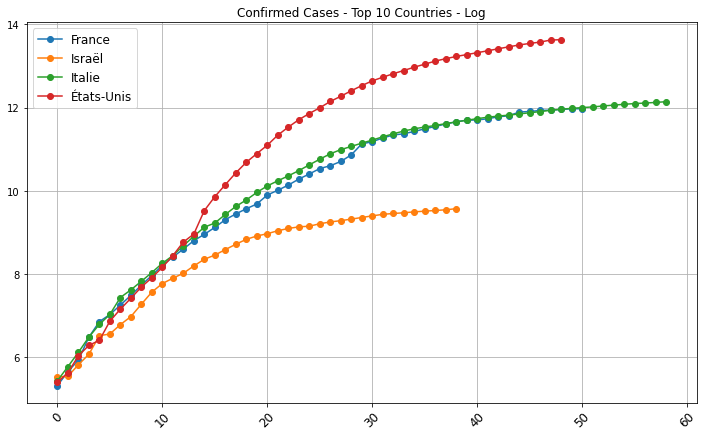

In [0]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(confirm_w, marker='o')
plt.title('Confirmed Cases - Top 10 Countries - Log')
ax.legend(confirm_w.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.xticks(rotation=45, fontsize=12)
#ax.set_yscale("log")
ax.grid(True)
plt.show()

In [0]:
dfcountrydaily=c10cases.copy().reset_index()

In [0]:
dfcountrydaily['Infday']=dfcountrydaily['Infections'].diff(1).fillna(0)
dfcountrydaily.loc[dfcountrydaily['time since'] ==0 , 'Infday'] = 0

In [0]:
dfcountrydaily[dfcountrydaily['Pays'] =="Israël"]

,index,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection,Dat1,time since,Infectionsl,Infday
51,7276,2020-03-15,Israël,251,0,4,0.00,1.59,98.41,2020-03-15,0,5.525453,0.0
52,7135,2020-03-16,Israël,255,0,4,0.00,1.57,98.43,2020-03-15,1,5.541264,4.0
53,6957,2020-03-17,Israël,337,0,11,0.00,3.26,96.74,2020-03-15,2,5.820083,82.0
54,6807,2020-03-18,Israël,433,0,11,0.00,2.54,97.46,2020-03-15,3,6.070738,96.0
55,6621,2020-03-19,Israël,677,0,11,0.00,1.62,98.38,2020-03-15,4,6.517671,244.0
56,6466,2020-03-20,Israël,705,0,14,0.00,1.99,98.01,2020-03-15,5,6.558198,28.0
57,6267,2020-03-21,Israël,883,1,36,0.11,4.08,95.81,2020-03-15,6,6.783325,178.0
58,6106,2020-03-22,Israël,1071,1,37,0.09,3.45,96.45,2020-03-15,7,6.976348,188.0
59,5898,2020-03-23,Israël,1442,1,41,0.07,2.84,97.09,2020-03-15,8,7.273786,371.0
60,5736,2020-03-24,Israël,1930,3,53,0.16,2.75,97.10,2020-03-15,9,7.565275,488.0


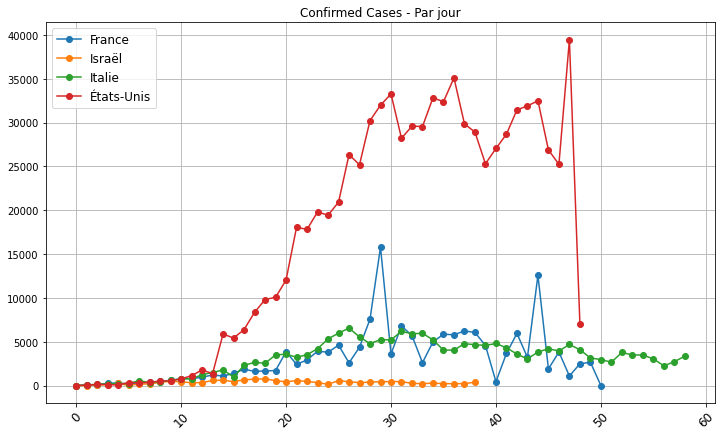

In [0]:
confirm_w = pd.pivot_table(dfcountrydaily.dropna(subset=['Infday']), index='time since', columns='Pays', values='Infday', aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(confirm_w, marker='o')
plt.title('Confirmed Cases - Par jour')
ax.legend(confirm_w.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.xticks(rotation=45, fontsize=12)
ax.grid(True)
plt.show()

# Israel

In [0]:
dfi=df[df["Pays"]=="Israël"]

In [0]:
#df["l200"]=df['Infections'].apply(lambda x: 1 if x > 200 else 0)
#df200=df[df.l200==1]
#df200=df200.groupby(["Pays"], as_index=False)["Date"].first()
#fus200=pd.merge(df, df200, on='Pays', how='left')
#fus200=fus200.dropna(subset=['Date_y'])
#fus200.Date_x=pd.to_datetime(fus200.Date_x)
#fus200.Date_y=pd.to_datetime(fus200.Date_y)
#fus200['time since'] = (fus200['Date_x'] - fus200["Date_y"]).dt.days


# Etude d'un pays

In [0]:
dfi=df[df["Pays"].isin(["Israël", "Royaume-Uni", 'France', 'États-Unis'])]
dfi.Date = pd.to_datetime(dfi.Date)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
from matplotlib import dates
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
def tsplot(df, date, axy, byhue):
  ax=sns.lineplot(data=df, x=date, y=axy, hue=byhue, marker='o')
  #ax.set(xticks=df.Date.values) Pour 1 libellé pour chaque point x
  ax.tick_params(rotation=45)
  plt.xlabel('Evolution', fontsize=20)
  # Define the date format
  date_form = DateFormatter("%m-%d")
  ax.xaxis.set_major_formatter(date_form)
  # Ensure a major tick for each week using (interval=1) 
  ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))


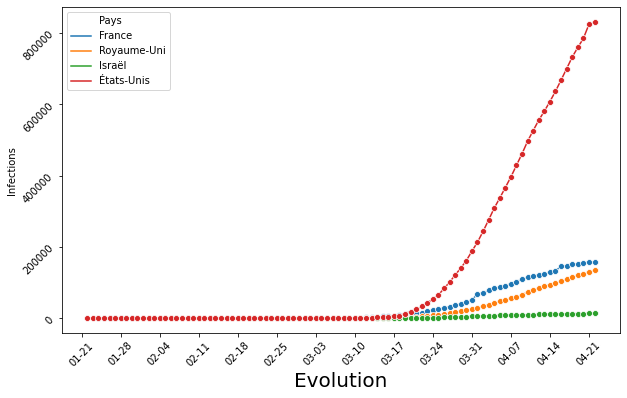

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
tsplot(dfi, 'Date', 'Infections', "Pays")

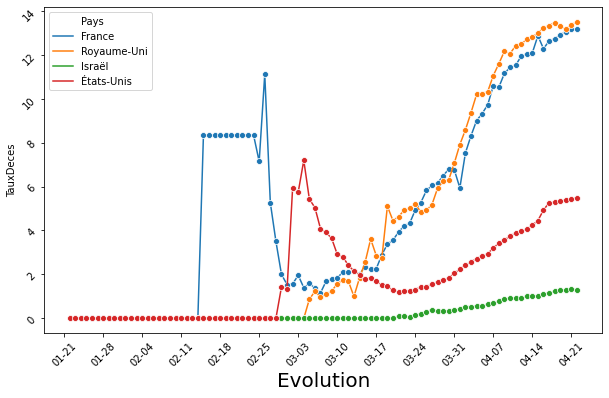

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
tsplot(dfi, 'Date', 'TauxDeces', "Pays")

# Ensemble de pays (les x 1 ers)

In [0]:
worldstat = df.groupby('Pays')["Infections"].sum().sort_values(ascending=False)

In [0]:
c10 = worldstat.head(10).index.tolist()
# Confirmed cases
c10cases = df[df['Pays'].isin(c10)]
confirm_w = pd.pivot_table(c10cases.dropna(subset=['Infections']), index='Date', 
                         columns='Pays', values='Infections', aggfunc=np.sum).fillna(method = 'ffill')
confirm_w = confirm_w.drop(['Chine'], axis=1)

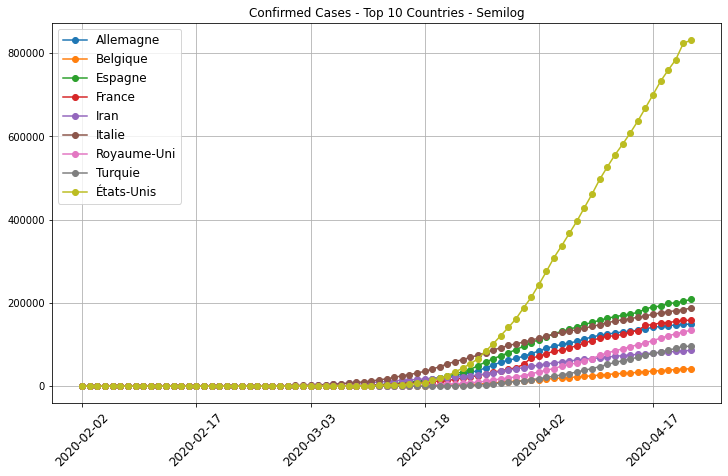

In [0]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(confirm_w[confirm_w.index>'2020-02-01'], marker='o')
plt.title('Confirmed Cases - Top 10 Countries - Semilog')
ax.legend(confirm_w.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
#ax.set_yscale("log")
plt.xticks(rotation=45, fontsize=12)
ax.grid(True)
plt.show()

# Taux de décès

In [0]:
c10 = worldstat.head(10).index.tolist()
# Confirmed cases
c10cases = df[df['Pays'].isin(c10)]
confirm_w = pd.pivot_table(c10cases.dropna(subset=['TauxDeces']), index='Date', 
                         columns='Pays', values='TauxDeces', aggfunc=np.sum).fillna(method = 'ffill')
confirm_w = confirm_w.drop(['Chine'], axis=1)

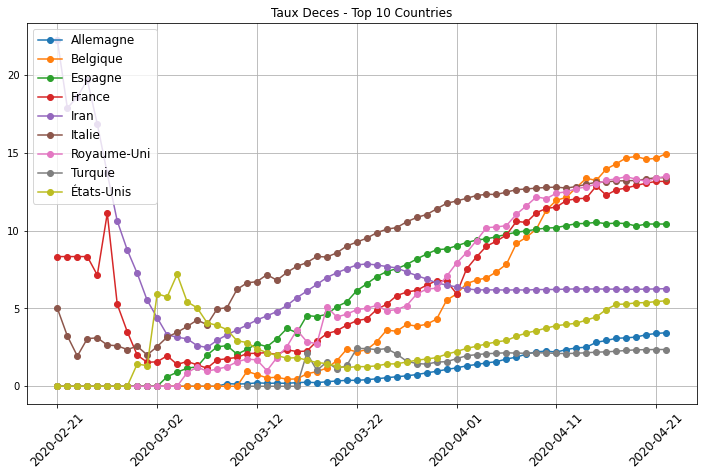

In [0]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(confirm_w[confirm_w.index>'2020-02-20'], marker='o')
plt.title('Taux Deces - Top 10 Countries')
ax.legend(confirm_w.columns, loc=2, fontsize=12)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.xticks(rotation=45, fontsize=12)
ax.grid(True)
plt.show()

# Etude bivariée

In [0]:
dflast=df[df.Date==df.Date.max()]

In [0]:
dflast=dflast[(dflast.TauxGuerison !=0) & (dflast.TauxDeces !=0) & (dflast.TauxGuerison !=100) & (dflast.TauxDeces !=100) & (dflast.Infections > 200)]

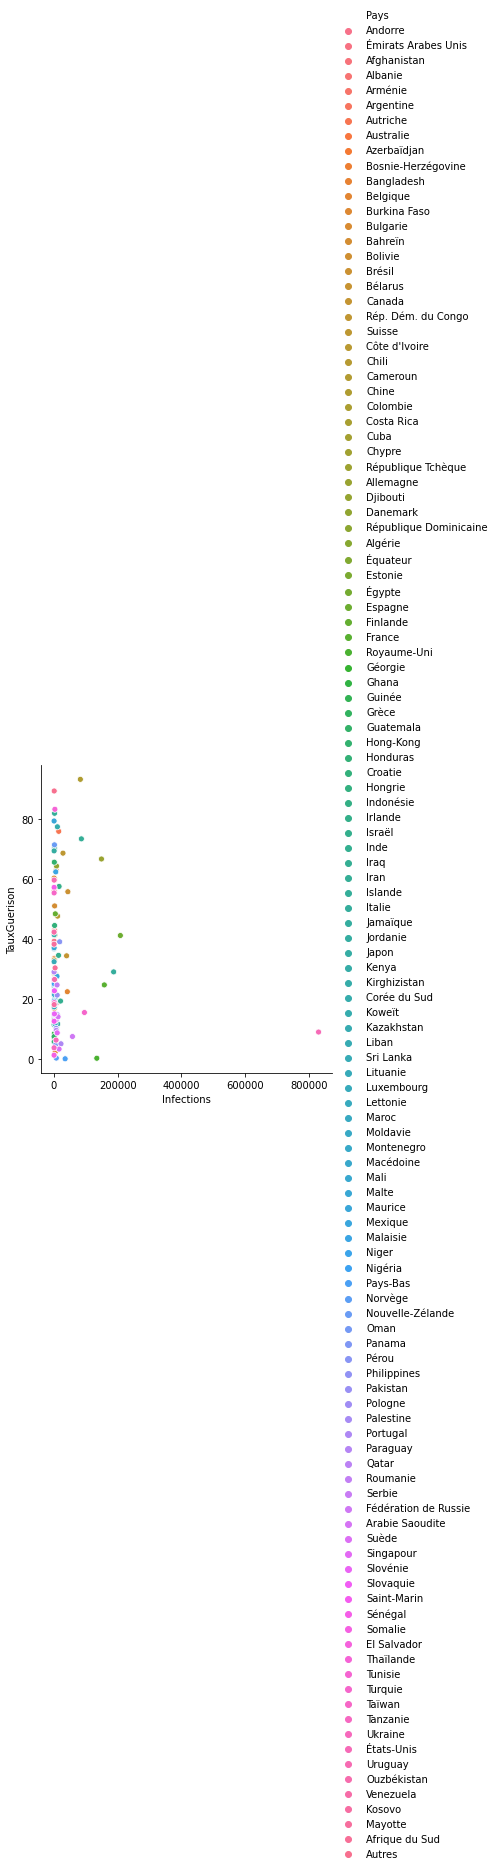

In [0]:
sns.relplot(data=dflast, hue="Pays", x='Infections', y="TauxGuerison")

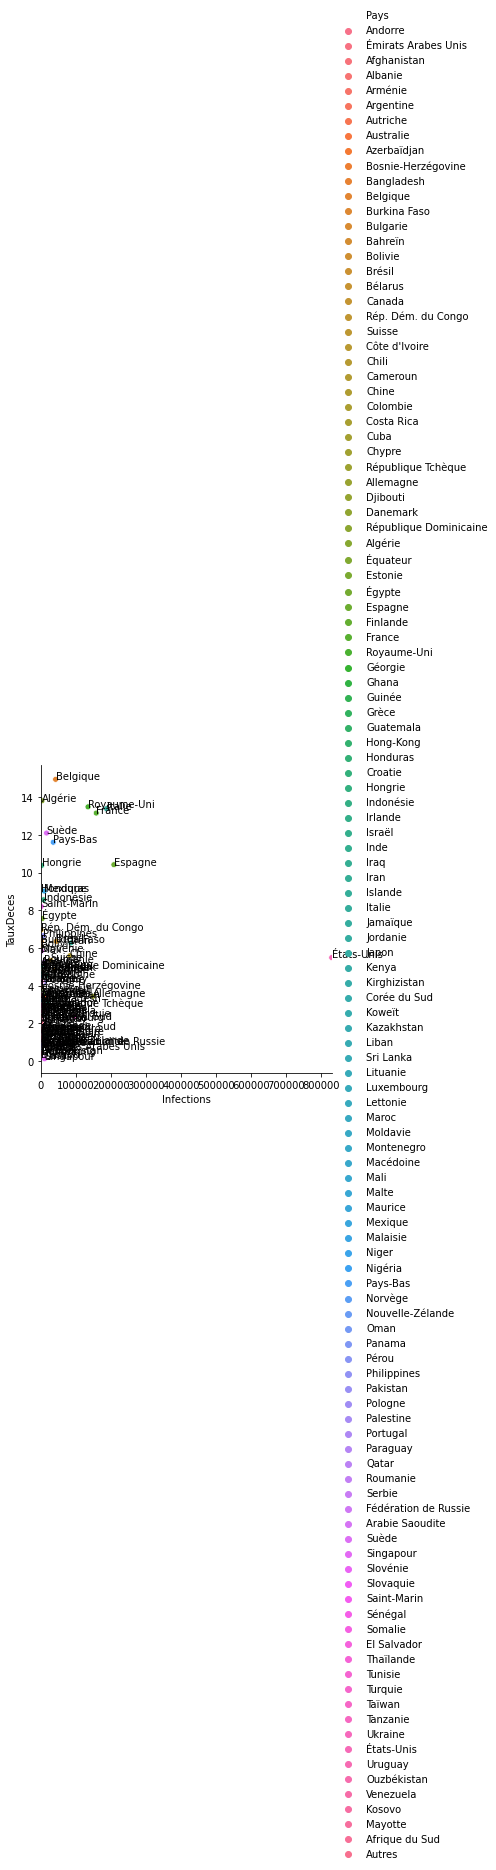

In [0]:
p1=sns.relplot(data=dflast, hue="Pays", x='Infections', y="TauxDeces")
for ax in p1.axes[0]:
    ax.set_xlim(0.0, max(dflast["Infections"]) + 1.9)
for row in dflast.itertuples():
    ax.text(row.Infections + 0.5, row.TauxDeces, row.Pays, horizontalalignment='left')
plt.show()

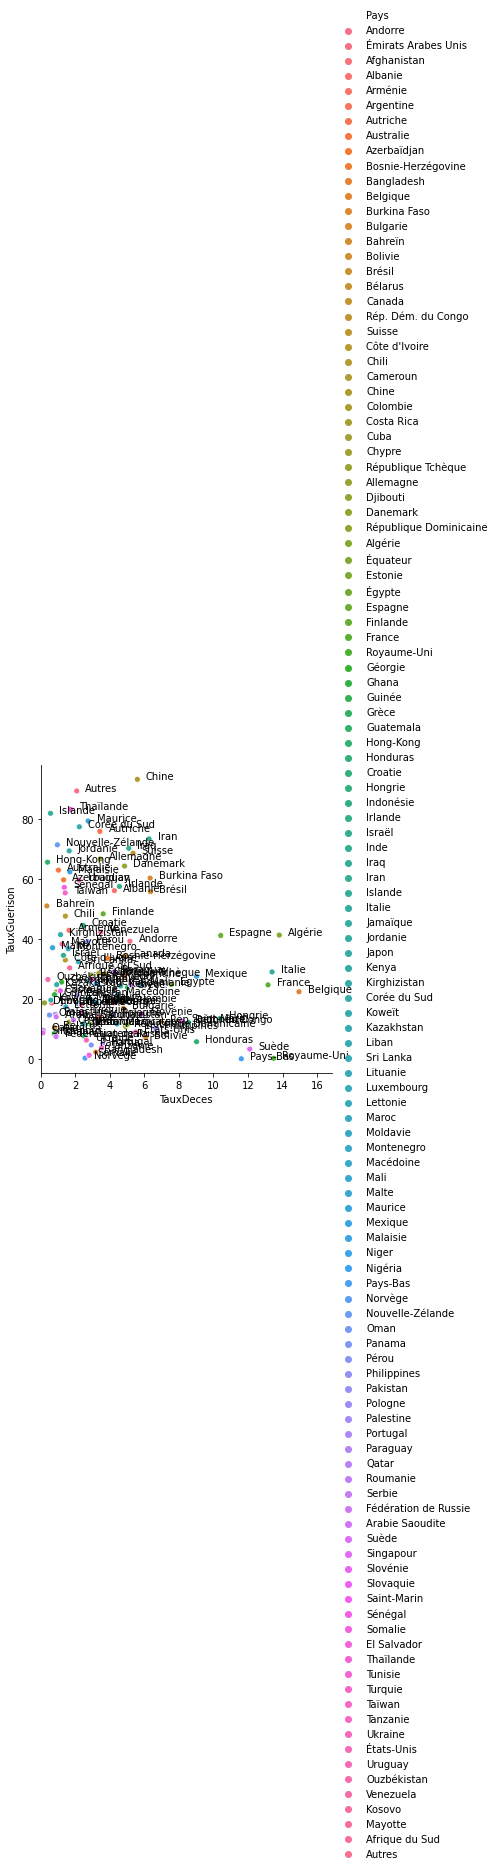

In [0]:
p1=sns.relplot(data=dflast, x='TauxDeces', y="TauxGuerison", hue="Pays")
for ax in p1.axes[0]:
    ax.set_xlim(0.0, max(dflast["TauxDeces"]) + 1.9)
for row in dflast.itertuples():
    ax.text(row.TauxDeces + 0.5, row.TauxGuerison, row.Pays, horizontalalignment='left')
plt.show()

# Croisement avec la pop + de 65 ans

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
dfp=pd.read_csv("Pop plus de 65 ans world.csv", sep=';' ,header=0,index_col=0, encoding='latin-1' , decimal=",")

FileNotFoundError: ignored

In [0]:
fus=pd.merge(dflast, dfp, on='Pays', how='inner')

In [0]:
p1=sns.relplot(data=fus, x='TauxDeces', y="Pop2018", hue="Pays")
for ax in p1.axes[0]:
    ax.set_xlim(0.0, max(fus["TauxDeces"]) + 1.9)
for row in fus.itertuples():
    ax.text(row.TauxDeces + 0.5, row.Pop2018, row.Pays, horizontalalignment='left')
plt.show()

# chine

In [0]:
dfi=df[df["Pays"]=="Chine"]

In [0]:
dfi.Date = pd.to_datetime(dfi.Date)
dfi.set_index("Date", inplace=True)
dfi['Infections'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Evolution', fontsize=20);